# Compare a global km-scale dataset to a regional one using HEALpix


Created by Julia Kukulies, May 2025 

In [1]:
# standard
import xarray as xr 
import numpy as np 
from pathlib import Path

# plotting 
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt

## HEALPix Specific
import healpy as hp
import healpix
import easygems.healpix as egh
import easygems.remap as egr

### Read in two datasets you want to compare

In [11]:
# path to regional data (here: WRF 4km over North America)
conus404 = Path('/glade/derecho/scratch/digital-earths-hackathon/conus404/healpix/') 

# path to global data (here: SCREAM global)
scream = Path('/glade/derecho/scratch/digital-earths-hackathon/e3sm') 

# load the same zoom level and variable, let's say precipitation @ zoom level 8  
variable = 'precipitation_flux'
zoom_level = 8 

conus_ds = xr.open_dataset(conus404 / ('conus404_2020_'+ str(variable)+'_hp' + str(zoom_level) +'.zarr'))
conus_precip = conus_ds[variable]

scream_ds= xr.open_dataset(scream / str('scream2D_ne120_all_hp'+  str(zoom_level) +'_v7.zarr'))
# add up liquid and ice portions of precipitation flux 
scream_precip = scream_ds.pr + scream_ds.prs 

In [24]:
# get the same units (mm/hr or kg/m2/s)
scream_precip_mmhr = scream_precip * 36e5

### Compute mean over the month of July

In [41]:
scream_precip_july =  scream_precip_mmhr.sel(time=slice("2020-06-01", "2020-06-30")).mean(dim="time")
conus_precip_july =  conus_precip.sortby("Time").sel(Time=slice("2020-06-01", "2020-06-30")).mean(dim="Time")

## Make comparison plot 

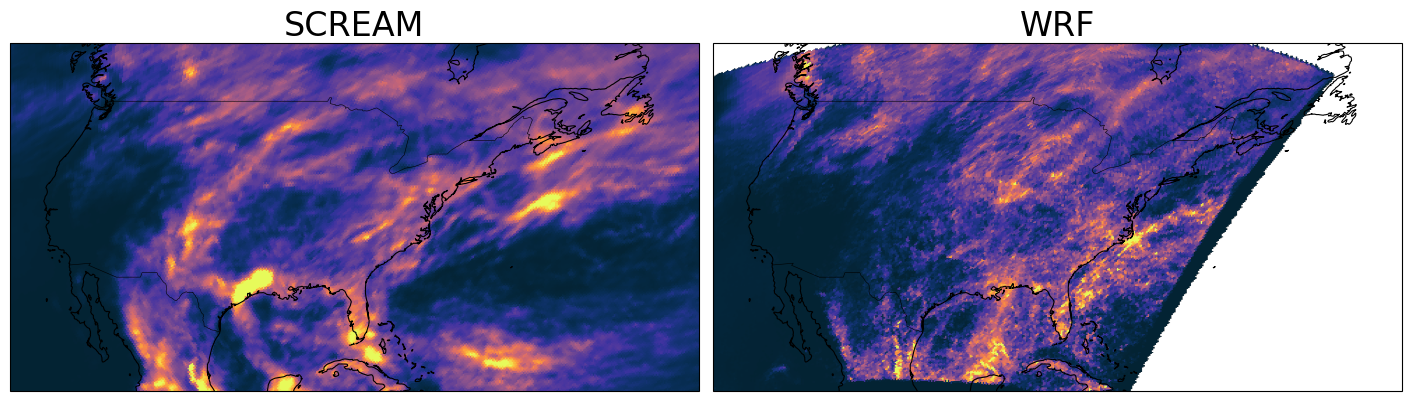

In [57]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import cmocean

# Example projection
projection = ccrs.Robinson(central_longitude=10)
fs = 24

# Create figure with 2 subplots
fig, axes = plt.subplots(
    ncols=2,
    figsize=(14, 5),
    subplot_kw={"projection": projection},
    constrained_layout=True
)

# Set same extent for both plots
extent = [-120, -50, 20, 55]

# First subplot
axes[0].set_extent(extent, crs=ccrs.PlateCarree())
egh.healpix_show(scream_precip_july, ax=axes[0], cmap=cmocean.cm.thermal, vmax=0.5)
axes[0].add_feature(cf.COASTLINE, linewidth=0.8)
axes[0].add_feature(cf.BORDERS, linewidth=0.4)
axes[0].set_title("SCREAM", fontsize = fs )

# Second subplot
axes[1].set_extent(extent, crs=ccrs.PlateCarree())
egh.healpix_show(conus_precip_july, ax=axes[1], cmap=cmocean.cm.thermal, vmax=0.5)
axes[1].add_feature(cf.COASTLINE, linewidth=0.8)
axes[1].add_feature(cf.BORDERS, linewidth=0.4)
axes[1].set_title("WRF", fontsize = fs )

plt.show()
